In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import scipy
import pandas as pd
import lmfit
import corner

In [2]:
#Define Hubble parameter.I am using Wetterich parametrization: w(z)=w0/[1+w1*ln(1+z)]^2 
def Hz1(z1,H01,Om1,w0,w1):
    #the redshift dependence of the dark energy density using Wetterich parametrization:
    w_z=w0/(1+w1*np.log(1+z1))**2
    I=(1+z1)**(3+3*w_z)
    E = np.sqrt((Om1*(1+z1)**3.) + (1-Om1)*I)
    HZ1 = H01*E
    return HZ1

In [3]:
#Define  random redshifts
num_zs = 1000
zs= np.linspace(0.01, 10., num=num_zs)

In [4]:
O_m=0.311
w_0=-0.9414
w_1=0.17
H_0=67.66

In [5]:
#Hubble comoving parameter
Hz=Hz1(zs,H_0,O_m,w_0,w_1)/(1+zs)

In [6]:
#random error for Hz
error_sigma = 0.5
e1 = np.random.normal(0., error_sigma, Hz.shape)

In [7]:
H_zz= Hz + e1

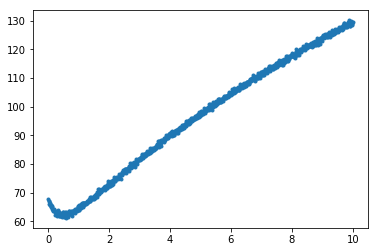

In [8]:
plt.plot(zs,H_zz, '.')

In [12]:
p = lmfit.Parameters()
p.add_many(('Om1',0.3,True,0.,2.),
           ('H01',70.,True,50.,100.),
           ('w0',-1.3,False,-3.,3.),
           ('w1',0.2,True,-2.,2.))

def residual(p):
    v = p.valuesdict()
    return (Hz1(zs,v['H01'],v['Om1'],v['w0'],v['w1'])/(1+zs)-H_zz)/error_sigma

In [13]:
mi = lmfit.minimize(residual, p, method='leastsq', nan_policy='omit')

[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 52
    # data points      = 1000
    # variables        = 3
    chi-square         = 3270.53769
    reduced chi-square = 3.28037883
    Akaike info crit   = 1190.95440
    Bayesian info crit = 1205.67767
[[Variables]]
    Om1:  0.25092155 +/- 0.01513175 (6.03%) (init = 0.3)
    H01:  73.6644002 +/- 0.19143316 (0.26%) (init = 70)
    w0:  -1.3 (fixed)
    w1:   0.30588595 +/- 0.04817790 (15.75%) (init = 0.2)
[[Correlations]] (unreported correlations are < 0.100)
    C(Om1, w1)  = -0.996
    C(Om1, H01) = -0.639
    C(H01, w1)  =  0.570


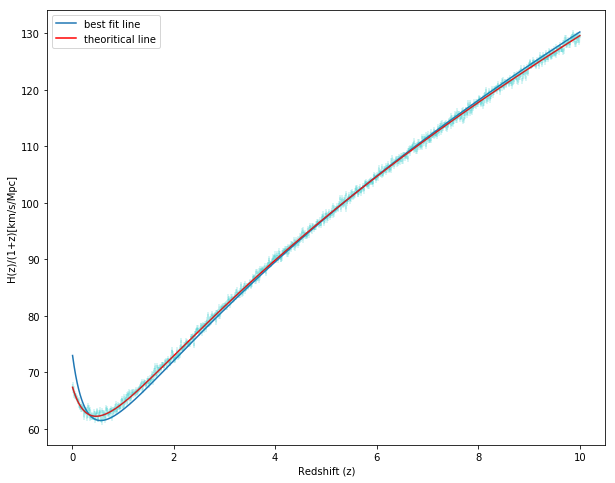

In [14]:
plt.figure(figsize=(10,8))
plt.errorbar(zs,H_zz,yerr=error_sigma,fmt='c',alpha=0.2)
#bestOde1= mi.params.valuesdict()['Ode1']
bestOm1 = mi.params.valuesdict()['Om1']
bestH01 = mi.params.valuesdict()['H01']
bestw0 = mi.params.valuesdict()['w0']
bestw1 = mi.params.valuesdict()['w1']
plt.plot(zs,Hz1(zs,bestH01,bestOm1,bestw0,bestw1)/(1+zs),'-',label="best fit line")
plt.plot(zs,Hz,'r',label="theoritical line")
plt.xlabel('Redshift (z)')
plt.ylabel('H(z)/(1+z)[km/s/Mpc]')
plt.legend(loc="upper left")
lmfit.report_fit(mi)

In [23]:
residuals=H_zz-Hz1(zs,bestH01,bestOm1,bestw0,bestw1)/(1+zs)

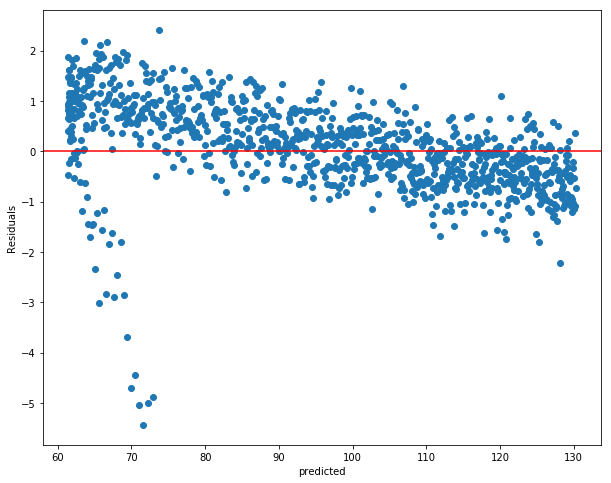

In [24]:
plt.figure(figsize=(10,8))
plt.plot(Hz1(zs,bestH01,bestOm1,bestw0,bestw1)/(1+zs),residuals,'o')
plt.xlabel('predicted')
plt.ylabel('Residuals')
plt.axhline(y=0., color='r', linestyle='-')
plt.show()

In [16]:
res = lmfit.minimize(residual, method='emcee', nan_policy='omit', burn=300, steps=1500, thin=1,
                         params=p, is_weighted=True)

emcee: Exception while calling your likelihood function:
  params: [ 0.27882338 73.16371629  0.20335047]
  args: (<function residual at 0x7f7ce9f1ede8>, Parameters([('Om1', <Parameter 'Om1', 0.27882337770911764, bounds=[0.0:2.0]>), ('H01', <Parameter 'H01', 73.16371628917591, bounds=[50.0:100.0]>), ('w0', <Parameter 'w0', value=-1.3 (fixed), bounds=[-3.0:3.0]>), ('w1', <Parameter 'w1', 0.20335047099337278, bounds=[-2.0:2.0]>)]), ['Om1', 'H01', 'w1'], array([[  0.,   2.],
       [ 50., 100.],
       [ -2.,   2.]]))
  kwargs: {'nan_policy': 'omit', 'userkws': {}, 'userargs': [], 'is_weighted': True, 'float_behavior': 'posterior'}
  exception:


Traceback (most recent call last):
  File "/usr/local/lib/python2.7/dist-packages/emcee/ensemble.py", line 519, in __call__
    return self.f(x, *self.args, **self.kwargs)
  File "/home/alexandra/.local/lib/python2.7/site-packages/lmfit/minimizer.py", line 2015, in _lnpost
    out = userfcn(params, *userargs, **userkwargs)
  File "<ipython-input-13-889a3a58e787>", line 9, in residual
    return (Hz1(zs,v['H01'],v['Om1'],v['w0'],v['w1'])/(1+zs)-H_zz)/error_sigma
KeyboardInterrupt


KeyboardInterrupt: 

In [ ]:
corner.corner(res.flatchain,labels=res.var_names, truths=list(res.params.valuesdict().values()))